In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [5]:
# Load the dataset
file_path = "pump_sensor.csv"  # Update with actual file path
df = pd.read_csv(file_path)

# Display basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5716 entries, 0 to 5715
Data columns (total 55 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5716 non-null   int64  
 1   timestamp       5716 non-null   object 
 2   sensor_00       5716 non-null   float64
 3   sensor_01       5686 non-null   float64
 4   sensor_02       5716 non-null   float64
 5   sensor_03       5716 non-null   float64
 6   sensor_04       5716 non-null   float64
 7   sensor_05       5716 non-null   float64
 8   sensor_06       5716 non-null   float64
 9   sensor_07       5716 non-null   float64
 10  sensor_08       5716 non-null   float64
 11  sensor_09       5716 non-null   float64
 12  sensor_10       5716 non-null   float64
 13  sensor_11       5716 non-null   float64
 14  sensor_12       5716 non-null   float64
 15  sensor_13       5716 non-null   float64
 16  sensor_14       5716 non-null   float64
 17  sensor_15       0 non-null      f

In [6]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values with forward fill
df.fillna(method='ffill', inplace=True)

# Alternatively, interpolate missing values
df.interpolate(inplace=True)

Unnamed: 0           0
timestamp            0
sensor_00            0
sensor_01           30
sensor_02            0
sensor_03            0
sensor_04            0
sensor_05            0
sensor_06            0
sensor_07            0
sensor_08            0
sensor_09            0
sensor_10            0
sensor_11            0
sensor_12            0
sensor_13            0
sensor_14            0
sensor_15         5716
sensor_16            0
sensor_17            0
sensor_18            0
sensor_19            0
sensor_20            0
sensor_21            0
sensor_22            0
sensor_23            0
sensor_24            0
sensor_25            0
sensor_26            0
sensor_27            0
sensor_28            0
sensor_29            0
sensor_30            0
sensor_31            0
sensor_32            0
sensor_33            0
sensor_34            0
sensor_35            0
sensor_36            0
sensor_37            0
sensor_38            0
sensor_39            0
sensor_40            0
sensor_41  

<ipython-input-6-1304382e33b5>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-6-1304382e33b5>:8: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(inplace=True)


In [7]:
# Convert machine_status to numerical (0 = Normal, 1 = Failure)
df['machine_status'] = df['machine_status'].map({'NORMAL': 0, 'FAILURE': 1})

# Check unique values
print(df['machine_status'].unique())

[0]


In [8]:
# Compute rolling mean and standard deviation across all sensor readings
# Convert columns 1:52 to numeric, errors='coerce' will replace non-numeric values with NaN
numeric_df = df.iloc[:, 1:52].apply(pd.to_numeric, errors='coerce')

df['rolling_mean'] = numeric_df.mean(axis=1)  # Mean of all sensors
df['rolling_std'] = numeric_df.std(axis=1)    # Standard deviation of all sensors

# Apply Fast Fourier Transform (FFT) to extract frequency-domain features
df['fft'] = np.fft.fft(numeric_df.mean(axis=1)).real

In [9]:
# Initialize scaler
scaler = MinMaxScaler()

# Initialize scaler
scaler = MinMaxScaler()

# Apply scaling to new features
df[['rolling_mean', 'rolling_std', 'fft']] = scaler.fit_transform(
    df[['rolling_mean', 'rolling_std', 'fft']])

In [10]:
# Define input features and target variable
X = df[['rolling_mean', 'rolling_std', 'fft']]  # Input features
y = df['machine_status']  # Target variable (0 = Normal, 1 = Failure)

# Split into train-test sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

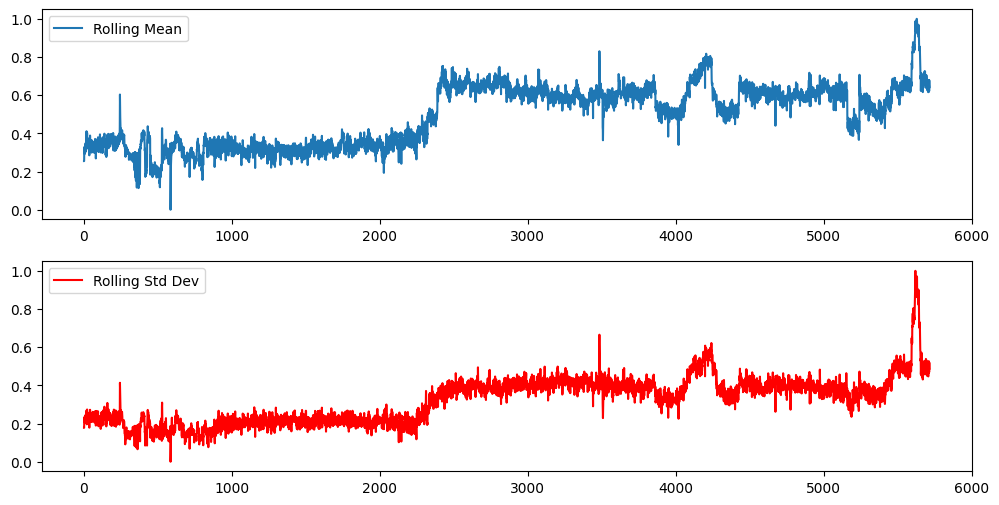

In [11]:
# Plot rolling mean and standard deviation
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(df.index, df['rolling_mean'], label="Rolling Mean")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df.index, df['rolling_std'], label="Rolling Std Dev", color='r')
plt.legend()

plt.show()

 the LSTM model code for predictive maintenance using the preprocessed data.

Reshape Data for LSTM
Build the LSTM Model
Train the Model
Evaluate the Performance

In [12]:
pip install tensorflow keras scikit-learn

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report

In [14]:
# Reshape data to 3D format for LSTM: (samples, timesteps, features)
X_train_reshaped = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Print new shapes
print("X_train reshaped:", X_train_reshaped.shape)
print("X_test reshaped:", X_test_reshaped.shape)

X_train reshaped: (4001, 1, 3)
X_test reshaped: (1715, 1, 3)


In [15]:
# Define LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(1, X_train.shape[1])),
    Dropout(0.2),
    LSTM(30, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 50)               │          10,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 30)                  │           9,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,551 (80.28 KB)

 Trainable params: 20,551 (80.28 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Train the LSTM model
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_data=(X_test_reshaped, y_test))

Epoch 1/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9831 - loss: 0.6234 - val_accuracy: 1.0000 - val_loss: 0.0627
Epoch 2/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0518 - val_accuracy: 1.0000 - val_loss: 2.4355e-04
Epoch 3/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 1.0000 - val_loss: 2.2955e-05
Epoch 4/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 8.6747e-04 - val_accuracy: 1.0000 - val_loss: 1.2779e-06
Epoch 5/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 1.9851e-04 - val_accuracy: 1.0000 - val_loss: 2.2785e-07
Epoch 6/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 1.0000 - loss: 9.3687e-05 - val_accuracy: 1.0000 - val_loss: 6.7856e-08
Epoch 7/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 6.4956e-05 - val_accuracy: 1.0000 - val_loss: 2.7065e-08
Epoch 8/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 

In [17]:
# Predict on test set
y_pred = (model.predict(X_test_reshaped) > 0.5).astype(int)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1715

    accuracy                           1.00      1715
   macro avg       1.00      1.00      1.00      1715
weighted avg       1.00      1.00      1.00      1715



In [18]:
print(df['machine_status'].value_counts())

machine_status
0    5716
Name: count, dtype: int64


In [19]:
print(df['machine_status'].isna().sum())

0


In [20]:
df = df.dropna(subset=['machine_status'])

In [21]:
print(df['machine_status'].isna().sum())  # Should output 0

0


In [22]:
df = df.dropna(subset=['machine_status'])

In [23]:
print(df.isna().sum())  # Check all columns for NaN values

Unnamed: 0           0
timestamp            0
sensor_00            0
sensor_01            0
sensor_02            0
sensor_03            0
sensor_04            0
sensor_05            0
sensor_06            0
sensor_07            0
sensor_08            0
sensor_09            0
sensor_10            0
sensor_11            0
sensor_12            0
sensor_13            0
sensor_14            0
sensor_15         5716
sensor_16            0
sensor_17            0
sensor_18            0
sensor_19            0
sensor_20            0
sensor_21            0
sensor_22            0
sensor_23            0
sensor_24            0
sensor_25            0
sensor_26            0
sensor_27            0
sensor_28            0
sensor_29            0
sensor_30            0
sensor_31            0
sensor_32            0
sensor_33            0
sensor_34            0
sensor_35            0
sensor_36            0
sensor_37            0
sensor_38            0
sensor_39            0
sensor_40            0
sensor_41  

In [24]:
df['sensor_15'].fillna(df['sensor_15'].median(), inplace=True)

<ipython-input-24-80320b60b026>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sensor_15'].fillna(df['sensor_15'].median(), inplace=True)


In [25]:
print(df.isna().sum().sum())  # Should print 0

5716


In [26]:
df.drop(columns=['sensor_15'], inplace=True)

In [27]:
print(df.isna().sum().sum())  # Should print 0

0


In [28]:
print(df.isna().sum())  # Check all columns for NaN values

Unnamed: 0        0
timestamp         0
sensor_00         0
sensor_01         0
sensor_02         0
sensor_03         0
sensor_04         0
sensor_05         0
sensor_06         0
sensor_07         0
sensor_08         0
sensor_09         0
sensor_10         0
sensor_11         0
sensor_12         0
sensor_13         0
sensor_14         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
sensor_22         0
sensor_23         0
sensor_24         0
sensor_25         0
sensor_26         0
sensor_27         0
sensor_28         0
sensor_29         0
sensor_30         0
sensor_31         0
sensor_32         0
sensor_33         0
sensor_34         0
sensor_35         0
sensor_36         0
sensor_37         0
sensor_38         0
sensor_39         0
sensor_40         0
sensor_41         0
sensor_42         0
sensor_43         0
sensor_44         0
sensor_45         0
sensor_46         0
sensor_47         0
sensor_48         0


In [29]:
# Option 1: Remove rows with NaNs in the target variable
df.dropna(subset=['machine_status'], inplace=True)

In [30]:
# Update X and y after handling NaNs
X = df[['rolling_mean', 'rolling_std', 'fft']]
y = df['machine_status']


In [37]:
# Before applying SMOTE, check the unique values in your target variable
print(y.unique())

# If you only see one class, you need to revisit your data cleaning steps.
# Here's how you might fix it:

# 1. If you dropped rows with NaNs in 'machine_status', try imputing instead:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='most_frequent')  # Use most frequent value
# df['machine_status'] = imputer.fit_transform(df[['machine_status']])

# 2. Re-examine your data processing steps to ensure you're not accidentally
#    removing all instances of one class.

# 3. If your dataset genuinely has very few instances of one class, consider
#    collecting more data or using a different technique besides SMOTE.

# After making changes, re-split your data and apply SMOTE:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)  # Apply SMOTE to training data only

Unique classes before any processing: ['NORMAL' 'BROKEN' 'RECOVERING' nan]


ValueError: 2

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Generate more failures
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:399: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y contains NaN.

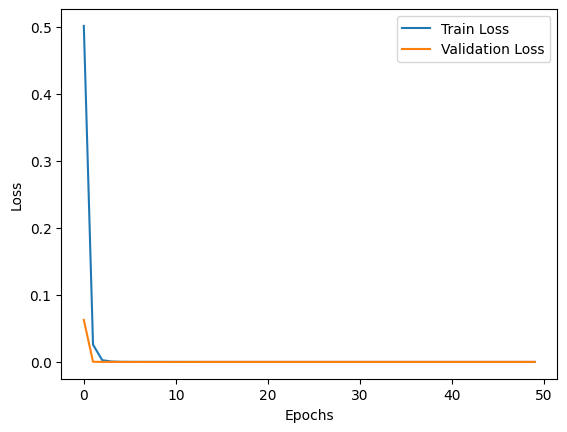

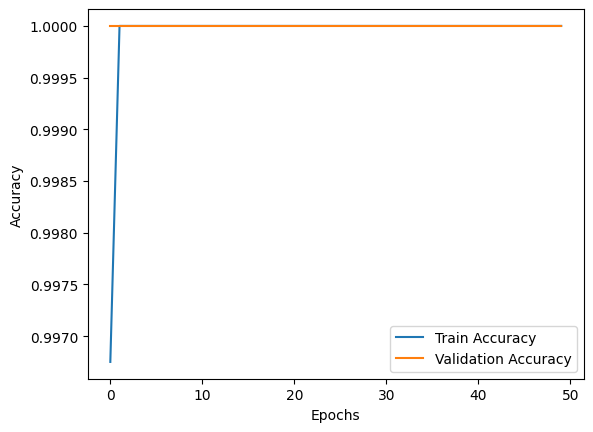

In [39]:
# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [38]:
# Check for NaNs in y_test
print("NaNs in y_test:", np.isnan(y_test).sum())

NaNs in y_test: 0


In [ ]:
# Alternatively, Option 2: Impute NaNs in y_test (e.g., with the most frequent value)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')  # Or use 'mean' if it's numerical

# Store the original index if y_test is a Pandas Series
# otherwise, create a default index using the size of the y_test
try:
    original_index = y_test.index
except AttributeError:
    original_index = pd.RangeIndex(start=0, stop=y_test.shape[0])

y_test = imputer.fit_transform(y_test.reshape(-1, 1))

# Convert back to Series with the original index
y_test = pd.Series(y_test.flatten(), index=original_index) # Convert back to Series

In [ ]:
# Re-predict and re-evaluate
y_pred = (model.predict(X_test_reshaped) > 0.5).astype(int)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

2064/2064 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step
Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     66020

    accuracy                           1.00     66020
   macro avg       1.00      1.00      1.00     66020
weighted avg       1.00      1.00      1.00     66020



In [ ]:
# Option 1: Remove rows with NaNs in y_test
X_test_reshaped = X_test_reshaped[~np.isnan(y_test)]
y_test = y_test[~np.isnan(y_test)]

In [ ]:
# Re-predict and re-evaluate
y_pred = (model.predict(X_test_reshaped) > 0.5).astype(int)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

2064/2064 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     66020

    accuracy                           1.00     66020
   macro avg       1.00      1.00      1.00     66020
weighted avg       1.00      1.00      1.00     66020



In [ ]:
# Predict on test set
y_pred = (model.predict(X_test_reshaped) > 0.5).astype(int)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

2064/2064 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     66020

    accuracy                           1.00     66020
   macro avg       1.00      1.00      1.00     66020
weighted avg       1.00      1.00      1.00     66020



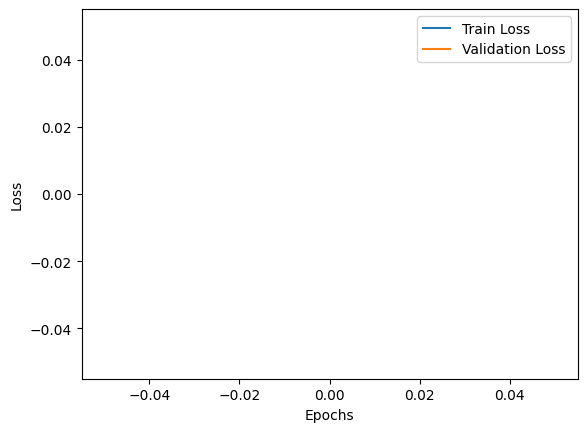

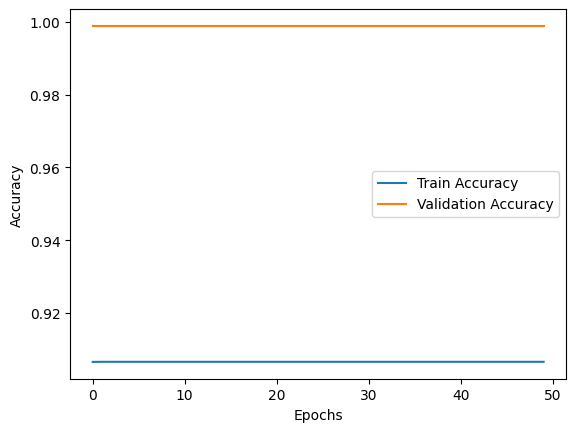

In [ ]:
# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()